# Bibliotecas

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Leitura de Arquivo

fonte: https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset

In [27]:
turbina = pd.read_csv(r'C:\Users\stef\Downloads\projeto\T1.csv')
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)', 'DirecaoVento(°)']
del turbina['DirecaoVento(°)']
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'], format='%d %m %Y %H:%M', errors='coerce')
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


# Plotando os dados no gráfico - Real

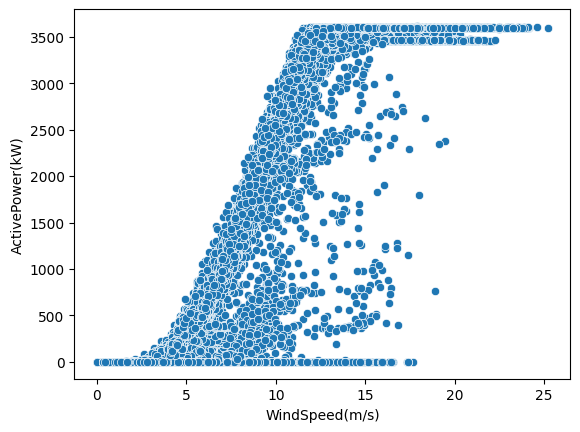

In [23]:
graf = sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)')

# Plotando os dados no gráfico - Teórica

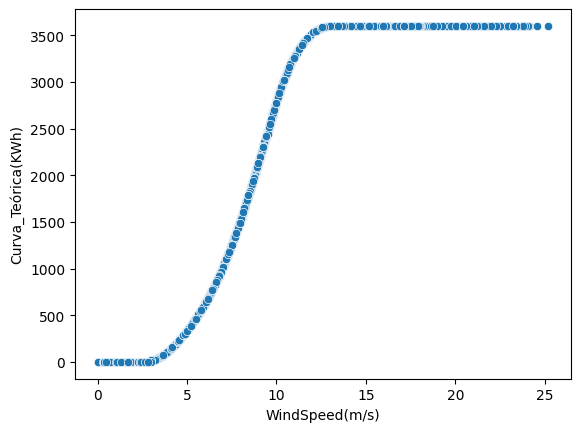

In [28]:
graf = sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Curva_Teórica(KWh)') 

# Criando "Limites Aceitaveis"

In [49]:
potencia_real = turbina['ActivePower(kW)'].tolist()
potencia_teorica = turbina['Curva_Teórica(KWh)'].tolist()

potencia_max = [p * 1.05 for p in potencia_teorica]
potencia_min = [p * 0.95 for p in potencia_teorica]

print(f"Tamanhos: Real={len(potencia_real)}, Teórica={len(potencia_teorica)}")

Tamanhos: Real=50530, Teórica=50530


# Comparacão de valores em cada potência

Foi criado baseado na potencia teorica, uma especie de limite.

In [50]:
dentro_limite = []
for p in range(len(potencia_real)):
    if potencia_real[p] >= potencia_min[p] and potencia_real[p] <= potencia_max[p]:
        dentro_limite.append('Dentro')
    elif potencia_real[p] == 0:
        dentro_limite.append('Zero')
    else: 
        dentro_limite.append('Fora')

proporcao = dentro_limite.count('Dentro')/len(dentro_limite)
print(f"Proporção 'Dentro': {proporcao:.2%}")

Proporção 'Dentro': 37.29%


# Adicionando lista "dentro_limite" ao dataframe

In [52]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


# Plotando novamente o gráfico:

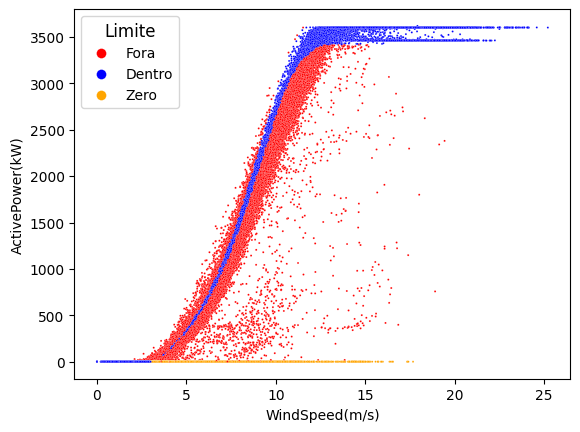

In [70]:
cores = {'Dentro':'blue', 'Fora':'red', 'Zero':'orange'}

sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)', hue='DentroLimite', s=2 , palette=cores)

plt.legend(title='Limite', title_fontsize='12', fontsize='10',  markerscale=5)

In [73]:
plt.savefig('wind_turbine_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>